<a href="https://colab.research.google.com/github/MatLock/UdeSa-Applied-Math-and-Optimization/blob/main/UdeSa_ejercicio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

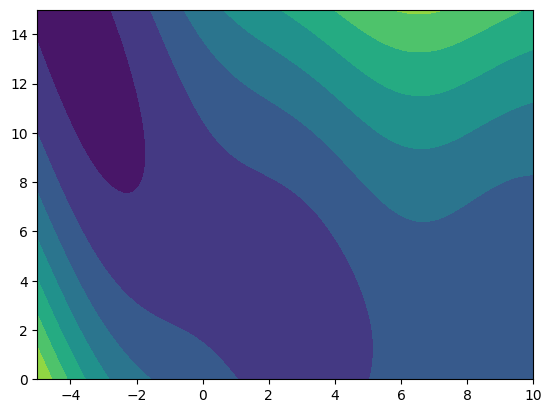

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from pylab import *
from scipy.optimize import minimize

a = 1
b = 5.1/(4 * np.pi**2)
c = 5 / np.pi
r = 6
s = 10
t = 1/(8 * np.pi )

def f(x1,x2):
  return a * ((x2 - b * (x1**2) + c * x1 - r)**2) + s *(1 - t) * np.cos(x1) + s + 5 * x1


def grad(x1,x2):
  x11 = 2 * a * (x2 - b * (x1**2) + (c * x1) - r) * (-2 * b * x1 + c) - s * (1 - t) * np.sin(x1) + 5
  x12 = 2 * a * (x2 - b * (x1**2) + c * x1 - r)
  return np.array([x11,x12])


x1 = np.linspace(-5,10, num = 100)
x2 = np.linspace(0,15, num = 100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.contourf(X1,X2,zz)


1.

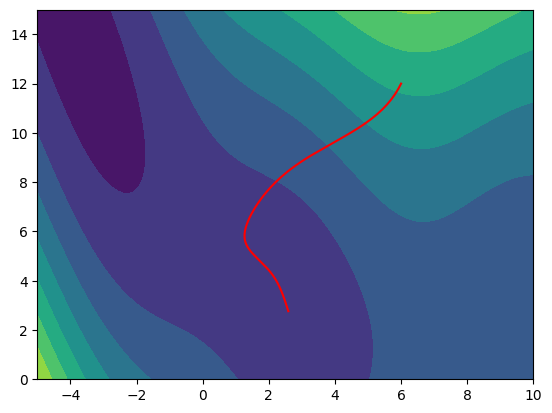

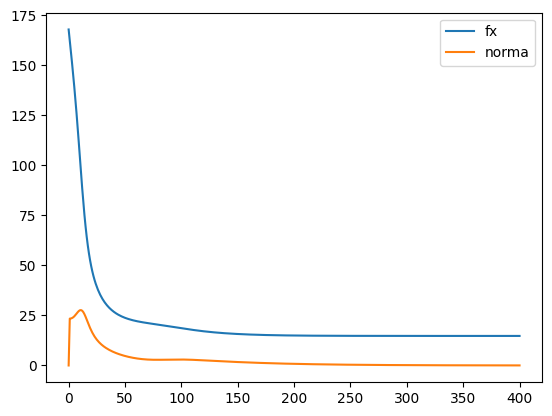

In [ ]:
alpha = 0.01
steps = 400

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)
norm = np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)


for i in range(steps):
  gradient = grad(xk[i],yk[i])
  xk[i+1] = xk[i] - alpha * gradient[0]
  yk[i+1] = yk[i] - alpha * gradient[1]
  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()


2. beta = 0.8

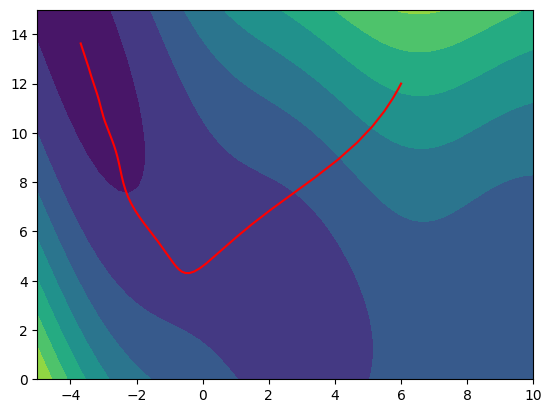

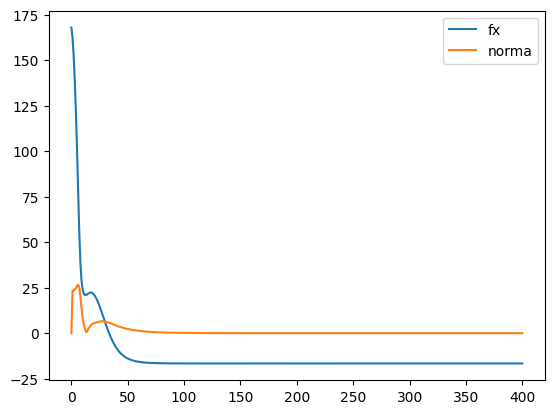

-3.6892852257200777
13.629987541031156


In [ ]:
alpha = 0.01
steps = 400
beta = 0.8

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)
vk_x = np.zeros(steps+1)
vk_y = np.zeros(steps+1)

norm = np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)

for i in range(steps):
  gradient = grad(xk[i],yk[i])
  vk_x[i+1] = beta * vk_x[i] - alpha * gradient[0]
  vk_y[i+1] = beta * vk_y[i] - alpha * gradient[1]
  xk[i+1] = xk[i] + vk_x[i+1]
  yk[i+1] = yk[i] + vk_y[i+1]

  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()
print(xk[-1])
print(yk[-1])

2. beta = 0.9

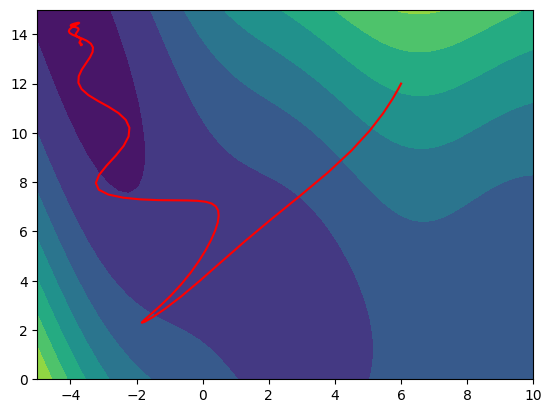

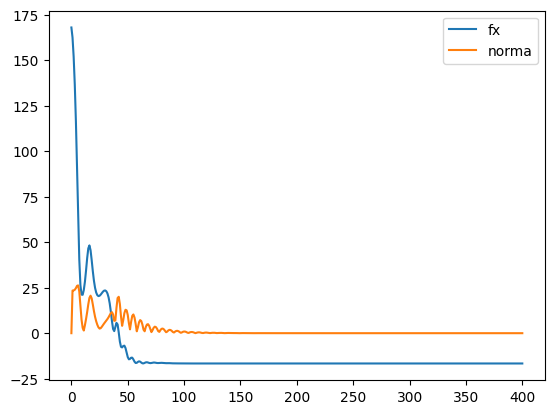

-3.689285266348566
13.62998769096984


In [ ]:
alpha = 0.01
steps = 400
beta = 0.9

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)
vk_x = np.zeros(steps+1)
vk_y = np.zeros(steps+1)

norm =np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)

for i in range(steps):
  gradient = grad(xk[i],yk[i])
  vk_x[i+1] = beta * vk_x[i] + alpha * gradient[0]
  vk_y[i+1] = beta * vk_y[i] + alpha * gradient[1]
  xk[i+1] = xk[i] - vk_x[i+1]
  yk[i+1] = yk[i] - vk_y[i+1]

  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()
print(xk[-1])
print(yk[-1])

3. beta =0.8

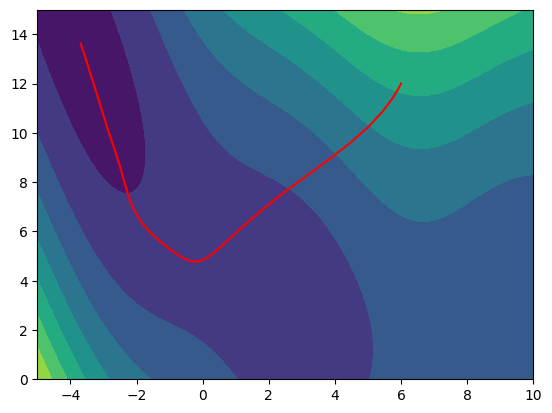

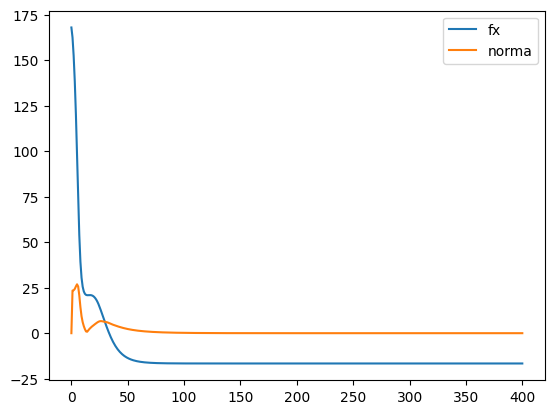

-3.6892851638360624
13.629987292768666


In [ ]:
alpha = 0.01
steps = 400
beta = 0.8

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)
vk_x = np.zeros(steps+1)
vk_y = np.zeros(steps+1)

norm =np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)

for i in range(steps):
  gradient = grad(xk[i] - beta * vk_x[i], yk[i] - beta * vk_y[i])
  vk_x[i+1] = beta * vk_x[i] + alpha * gradient[0]
  vk_y[i+1] = beta * vk_y[i] + alpha * gradient[1]
  xk[i+1] = xk[i] - vk_x[i+1]
  yk[i+1] = yk[i] - vk_y[i+1]

  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()
print(xk[-1])
print(yk[-1])

3. beta = 0.9

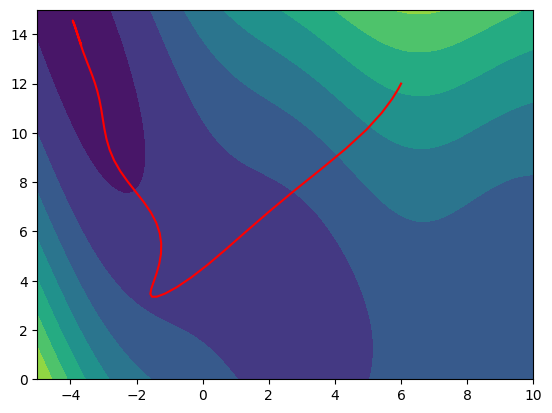

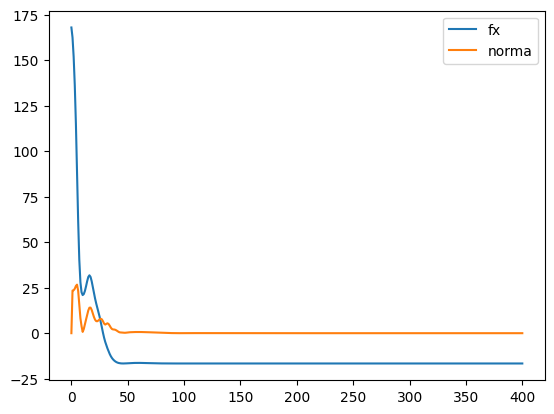

-3.6892852712063737
13.629987723510279


In [ ]:
alpha = 0.01
steps = 400
beta = 0.9

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)
vk_x = np.zeros(steps+1)
vk_y = np.zeros(steps+1)

norm =np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)

for i in range(steps):
  gradient = grad(xk[i] - beta * vk_x[i], yk[i] - beta * vk_y[i])
  vk_x[i+1] = beta * vk_x[i] + alpha * gradient[0]
  vk_y[i+1] = beta * vk_y[i] + alpha * gradient[1]
  xk[i+1] = xk[i] - vk_x[i+1]
  yk[i+1] = yk[i] - vk_y[i+1]

  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()
print(xk[-1])
print(yk[-1])

4.

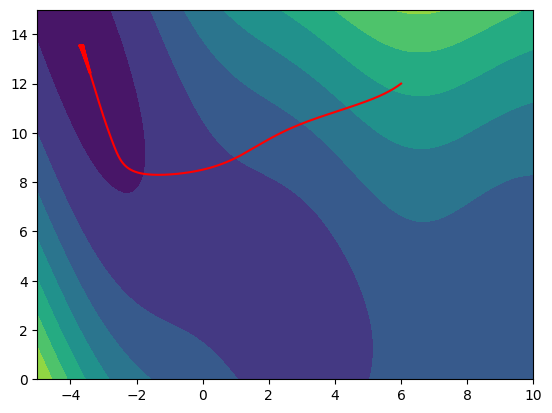

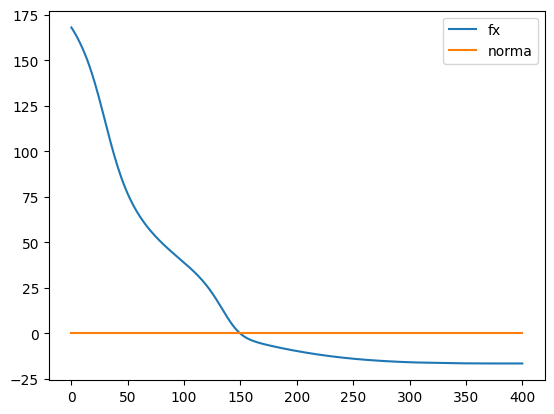

-3.726648939471597
13.54844000633332


In [ ]:
alpha = 0.01
steps = 400
beta = 0.9
epsilon = 10**(-4)

xk = np.zeros(steps+1)
yk = np.zeros(steps+1)
fk = np.zeros(steps+1)

pkx = np.zeros(steps+1)
dkx = np.zeros(steps+1)
rkx = np.zeros(steps+1)

pky = np.zeros(steps+1)
dky = np.zeros(steps+1)
rky = np.zeros(steps+1)

norm =np.zeros(steps+1)

xk[0] = 6
yk[0] = 12
fk[0] = f(6,12)

for i in range(steps):
  gradientx = grad(xk[i], yk[i])[0]
  gradienty = grad(xk[i], yk[i])[1]

  rkx[i+1] = beta * rkx[i] + (1 - beta) * gradientx**2
  pkx[i+1] = -(np.sqrt(dkx[i] + epsilon) / np.sqrt(rkx[i+1] + epsilon) * gradientx)
  dkx[i+1] = beta * dkx[i] + (1 - beta) * (pkx[i+1]**2)

  rky[i+1] = beta * rky[i] + (1 - beta) * gradienty**2
  pky[i+1] = -(np.sqrt(dky[i] + epsilon) / np.sqrt(rky[i+1] + epsilon) * gradienty)
  dky[i+1] = beta * dky[i] + (1 - beta) * (pky[i+1]**2)

  xk[i+1] = xk[i] + pkx[i+1]
  yk[i+1] = yk[i] + pky[i+1]

  fk[i+1] = f(xk[i+1],yk[i+1])
  norm[i+1] = np.linalg.norm(gradient)

x1 = np.linspace(-5,10,num=100)
x2 = np.linspace(0,15,num=100)
X1,X2 = np.meshgrid(x1,x2, indexing = 'ij')
zz = f(X1,X2)
plt.figure(0)
plt.contourf(X1,X2,zz)
plt.plot(xk,yk,'r')
plt.figure(1)
plt.plot(fk, label="fx")
plt.plot(norm, label="norma")
plt.legend()
plt.show()
print(xk[-1])
print(yk[-1])

1. El metodo de optimizacion 1 no posee acelerador, es simplemente un gradiente descendente con un alpha fijo (muy parecido a exact line search). En los demás,
hay factores como el momentum.

2. El algoritmo del ejercicio 4 converge mas rapido, ya que llega al minimo de la funcion de costo en menor cantidad de iteraciones (practicamente desde la iteracion 0)

3. solo si se quiere reducir el costo computacional, ya que SGD evalua solo una porcion de los datos, que incluso se puede parametrizar utilizando mini-batch.

4. al cambiar los betas estas amplificando o disminuyendo el factor de aceleracion en el calculo de momentum para la funcion de minimizacion.
Al cambiar los betas, el camino hacia el minimo se hace mas inestable, tambien es posible que con un beta mayor, se llegue al minimo en menos iteraciones.

5. Epsilon es un hiper parametro, por el momento la unica tecnica aprendida
fue "prueba y error"

6. Quizas podria intentar un approach de "backtracking linear search" para el calculo del pk incluyendo a epsilon, pero no se como lo haria